              Year  PerFemEmploy  FertilityRate  Ratio_MaletoFemale  \
count    25.000000     25.000000      23.000000           25.000000   
mean   2007.000000     27.680800       2.711304           34.947600   
std       7.359801      2.842613       0.526535            5.068672   
min    1995.000000     24.300000       2.060000           28.330000   
25%    2001.000000     25.780000       2.250000           31.020000   
50%    2007.000000     26.560000       2.600000           33.500000   
75%    2013.000000     28.990000       3.120000           38.490000   
max    2019.000000     33.820000       3.710000           44.500000   

       PerFemEmployers  Agriculture   Industry   Services  Wage&Salaried  \
count        25.000000    25.000000  25.000000  25.000000      25.000000   
mean          0.196400    70.272400  12.018800  17.710400      21.965200   
std           0.179325     7.795071   3.171068   4.709609       4.512734   
min           0.090000    59.030000   7.460000   7.56000

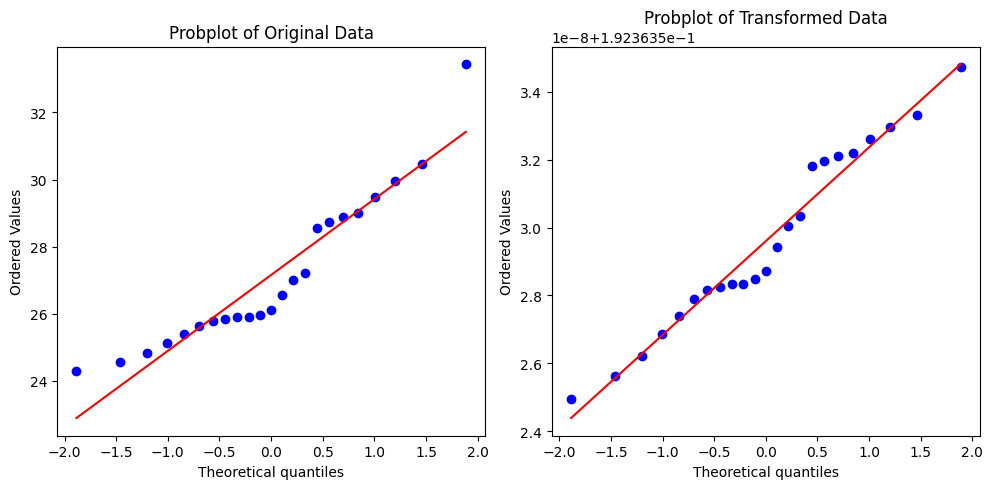

Уравнение регрессии:
Y = -2565.782268354291 + 0.8145200443316454*X1 + 29.02135732031371*X2 + 28.556178836364296*X3 + 29.0735771868562*X4 + -3.333080481731713*X5 + -26.56120506413035*X6 + -26.625319060086667*X7 + 23.248292197235543*X8
Коэффициент корреляции между PerFemEmploy и FertilityRate: -0.8687759413010854


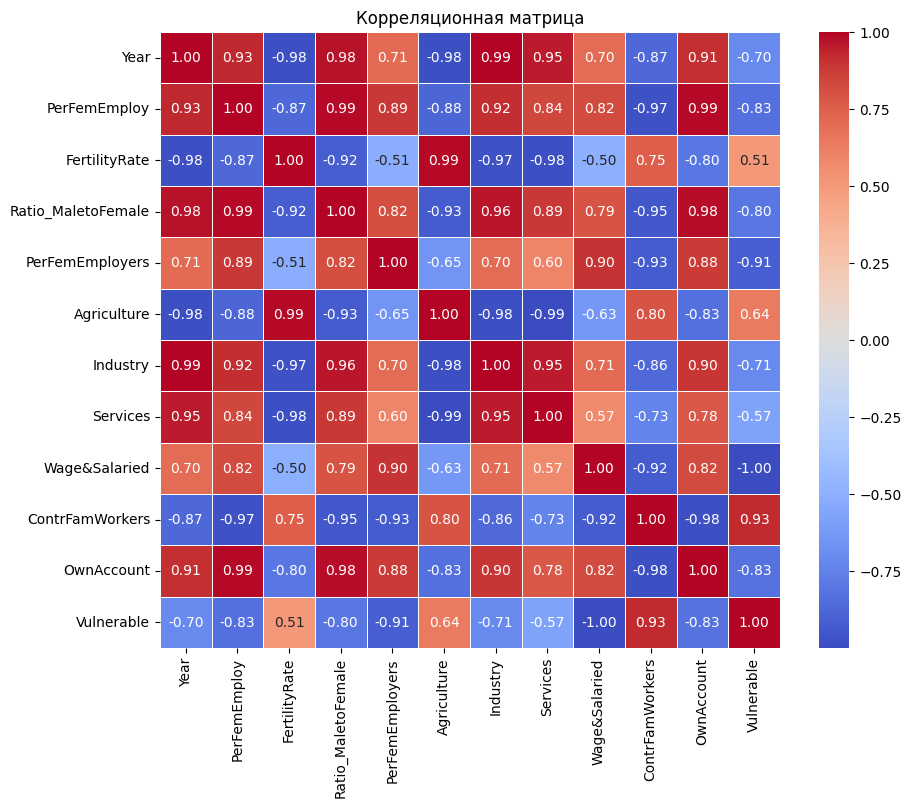

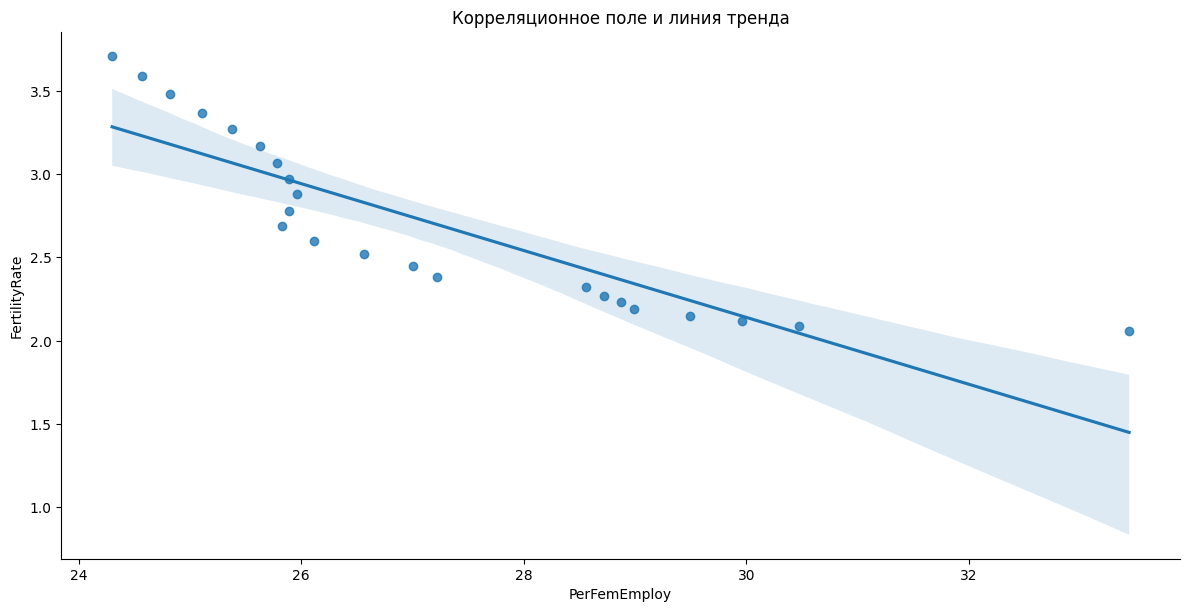

In [29]:
import pandas as pd
import statsmodels.api as sm
from scipy.stats import boxcox
import numpy as np
from scipy.stats import probplot
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("MLR2.csv")
# # Проверка типов данных
# print(df.dtypes)
# Преобразование столбца "FertilityRate" в числовой формат
df['FertilityRate'] = pd.to_numeric(df['FertilityRate'], errors='coerce')

# # Проверка типов данных после преобразования
# print(df.dtypes)
df.head()

# Сводка данных
print(df.describe())

# Проверка размерности данных
print(df.shape)

# Проверка наличия пропущенных значений (NA)
NA_values = pd.DataFrame({'no_of_na_values': df.isna().sum()})
print(NA_values.head())

# Удаление строк с пропущенными значениями
newdata = df.dropna()

# Размер нового набора данных
print(newdata.shape)  # После удаления строк с NA значениями


# Определение зависимой и независимых переменных
X = newdata[['FertilityRate', 'Ratio_MaletoFemale', 'PerFemEmployers', 'Agriculture', 'Industry', 'Services',
              'Wage&Salaried', 'ContrFamWorkers', 'OwnAccount', 'Vulnerable']]
y = newdata['PerFemEmploy']

# Добавление константы к независимым переменным (для получения коэффициента сдвига)
X = sm.add_constant(X)

# Построение модели множественной линейной регрессии
model = sm.OLS(y, X).fit()

# Вывод сводки результатов
print(model.summary())

# Функция для выполнения шаговой регрессии с использованием критерия AIC
def stepwise_regression_AIC(X, y):
    best_model = None
    best_aic = float("inf")  # Начальное значение для лучшего AIC

    # Итерируемся по всем возможным комбинациям предикторов
    for i in range(1, len(X.columns) + 1):
        predictors = X.columns[:i]
        X_subset = sm.add_constant(X[predictors])
        model = sm.OLS(y, X_subset).fit()
        aic = model.aic
        
        # Обновляем лучшую модель, если текущая имеет меньший AIC
        if aic < best_aic:
            best_aic = aic
            best_model = model
    
    return best_model



# Вызываем функцию для выполнения шаговой регрессии с использованием критерия AIC
best_model = stepwise_regression_AIC(X, y)

# Выводим сводку результатов
print(best_model.summary())

# Определение независимых переменных
X = newdata[['Ratio_MaletoFemale', 'Agriculture', 'Industry', 'Services',
             'Wage&Salaried', 'ContrFamWorkers', 'OwnAccount', 'Vulnerable']]
# Добавление константы к независимым переменным
X = sm.add_constant(X)

# Определение зависимой переменной
y = newdata['PerFemEmploy']

# Построение модели линейной регрессии
model = sm.OLS(y, X).fit()

# Вывод сводки результатов
print(model.summary())

# Определение зависимой переменной
y = newdata['PerFemEmploy']

# Применение преобразования Бокса-Кокса
transformed_y, lambda_value = boxcox(y)

# Вывод значения lambda, найденного в процессе преобразования
print("Lambda value:", lambda_value)

# Вывод преобразованной зависимой переменной
print("Transformed y:", transformed_y)

# Создание графика "Probplot" для исходных данных
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
probplot(y, dist="norm", plot=plt)
plt.title('Probplot of Original Data')

# Создание графика "Probplot" для преобразованных данных
plt.subplot(1, 2, 2)
probplot(transformed_y, dist="norm", plot=plt)
plt.title('Probplot of Transformed Data')

plt.tight_layout()
plt.show()

# Получение коэффициентов регрессии
intercept = model.params['const']
coefficients = model.params.drop('const')  # Коэффициенты для независимых переменных

# Вывод уравнения регрессии
equation = f"Y = {intercept}"
for i, coef in enumerate(coefficients):
    equation += f" + {coef}*X{i+1}"

print("Уравнение регрессии:")
print(equation)

# Вычисление коэффициента корреляции между двумя переменными
correlation = newdata['PerFemEmploy'].corr(newdata['FertilityRate'])

# Вывод коэффициента корреляции
print("Коэффициент корреляции между PerFemEmploy и FertilityRate:", correlation)
# Корреляционная матрица
correlation_matrix = df.corr()

# Визуализация корреляционной матрицы с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Корреляционная матрица")
plt.show()

sns.lmplot(x="PerFemEmploy", y="FertilityRate", data=df, aspect=2, height=6)
plt.title("Корреляционное поле и линия тренда")
plt.xlabel("PerFemEmploy")
plt.ylabel("FertilityRate")
plt.show()

